In [1]:
import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X , y = load_boston().data, load_boston().target.reshape(-1,1)

In [3]:
X.shape, y.shape

((506, 13), (506, 1))

In [16]:
class nn_2layers_regression(object):
    def __init__(self, eta = 0.005, iteration = 1000, epsilon = 0.01, layer_dims =[13,40,40,1]):
        self.eta = eta
        self.iteration = iteration
        self.epsilon = epsilon
        self.layer_dims = layer_dims
        self.layer = len(layer_dims)
        
    def fit(self,X,y):
        X_ = X.T
        y_ = y.T
        m_ = len(y)
        A0 = X_
        cost_ = []
        i = 1
        parameters = {}
        for l in range(1,self.layer):
            parameters['W'+str(l)] = np.random.randn(self.layer_dims[l],self.layer_dims[l-1]) * self.epsilon
            parameters['b'+str(l)] = np.zeros((self.layer_dims[l],1))
            
        while(i != self.iteration):
            #forward prop.
            Z1 =  np.dot(parameters['W1'],A0) + parameters['b1']
            A1 =  self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            A2 =  self.sigmoid(Z2)
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 =  Z3
            #cost 
            cost = self.mae(y_, A3, m_)
            cost_.append(cost)
            #derivatives
            dZ3 =  A3 - y_
            dW3 =  (1/m_) * np.dot(dZ3,A2.T)
            db3 =  (1/m_) * np.sum(dZ3, axis = 1, keepdims= True)
            dZ2 =  np.dot(parameters['W3'].T,dZ3) * (A2 * (1-A2))
            dW2 =  (1/m_) * np.dot(dZ2,A1.T)
            db2 =  (1/m_) * np.sum(dZ2, axis = 1, keepdims= True)
            dZ1 =  np.dot(parameters['W2'].T,dZ2) * (A1 * (1-A1))
            dW1 =  (1/m_) * np.dot(dZ1,A0.T)
            db1 =  (1/m_) * np.sum(dZ1, axis = 1, keepdims= True)
            #backprog
            parameters['W3'] -= self.eta * dW3
            parameters['b3'] -= self.eta * db3
            parameters['W2'] -= self.eta * dW2
            parameters['b2'] -= self.eta * db2
            parameters['W1'] -= self.eta * dW1
            parameters['b1'] -= self.eta * db1
            if i % 100 ==0:
                print(f'epoch:{i}: cost:{cost}:')
            i += 1
        history = pd.DataFrame(cost_, columns = ['cost'])
        plt.figure(figsize = (14,4))
        plt.subplot(1,1,1)
        plt.plot(history.cost)
        plt.show()
        return parameters
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    
    def mae(self,y_true,y_pred,m_):
        return np.sum(np.abs(y_true - y_pred))/m_

epoch:100: cost:7.546668638936128:
epoch:200: cost:6.024803788848797:
epoch:300: cost:5.96426910661583:
epoch:400: cost:5.744332541580362:
epoch:500: cost:5.613570917241401:
epoch:600: cost:5.5216721917332965:
epoch:700: cost:5.5312064753913806:
epoch:800: cost:5.362482435923342:
epoch:900: cost:5.758621618306186:
epoch:1000: cost:5.3859578026587895:
epoch:1100: cost:5.17096674005786:
epoch:1200: cost:5.1075774579295885:
epoch:1300: cost:5.057477340571973:
epoch:1400: cost:5.280605258249116:
epoch:1500: cost:6.207695832687776:
epoch:1600: cost:4.878899131345198:
epoch:1700: cost:4.95746984624191:
epoch:1800: cost:4.935283839348378:
epoch:1900: cost:4.98734259112595:
epoch:2000: cost:4.889108278863133:
epoch:2100: cost:4.759143571524284:
epoch:2200: cost:5.298823309442123:
epoch:2300: cost:4.818995612103155:
epoch:2400: cost:5.470567544102194:
epoch:2500: cost:5.722013890010435:
epoch:2600: cost:5.768583381373847:
epoch:2700: cost:6.125296034021704:
epoch:2800: cost:4.613245878511687:
e

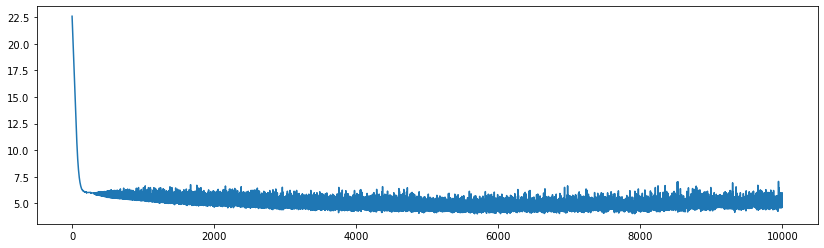

In [17]:
parameters = nn_2layers_regression(eta = 0.0005, iteration= 10000, epsilon= 0.01, layer_dims= [13,50,60,1]).fit(X,y)

In [18]:
parameters

{'W1': array([[-1.73577285e-01,  9.05373188e-02, -9.72889387e-02,
          1.25768731e-02, -8.78484270e-03,  1.40022928e-01,
         -3.52486966e-02, -7.49748200e-02,  9.54307338e-02,
          7.59311641e-02, -2.26032429e-01,  8.36387726e-02,
         -9.51498266e-01],
        [ 6.61078473e-03, -6.87051924e-02, -2.34500575e-02,
          1.54240035e-02,  2.05235189e-04, -2.25856341e-02,
          1.42514070e-02,  8.86708599e-03,  4.28093332e-03,
          8.84658612e-02,  4.61953966e-02, -1.09694733e-01,
          1.54052312e-01],
        [-6.51125437e-02,  4.94035612e-02,  1.65416911e-02,
          7.47347468e-03, -2.19610972e-02,  3.20560766e-02,
         -6.94292846e-02, -2.40180149e-02,  3.31731679e-02,
          3.53157773e-02, -7.11520184e-02,  5.47382167e-02,
         -3.24757602e-01],
        [-3.23038542e-03,  4.56615584e-04,  6.85503736e-03,
         -1.21308478e-02, -1.06930378e-02, -1.85850236e-02,
          1.28533558e-02, -1.43586132e-02, -8.36174802e-03,
         -2.8